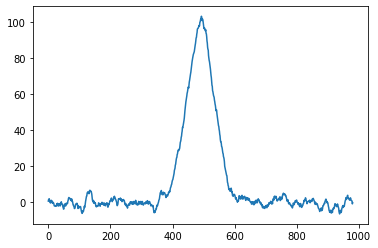

In [204]:
import matplotlib.pyplot as plt
import numpy as np

posterior = np.random.normal(0, 10, size=(1000)) + 100*np.exp((-((500-np.arange(1000))/60)**2)) 
# running mean of last 20 samples
posterior = np.convolve(posterior, np.ones((20,))/20, mode='valid')
plt.plot(posterior)

In [205]:
def generate_samples(unnormalized_posterior, n_samples=1000, burn_in=50, start_sample = None):
    samples = np.zeros(n_samples+1, dtype=int)
    samples[0] = 0 if start_sample is None else start_sample

    rejection_count = 0
    for i in range(1, n_samples):
        # samples[i] = posterior[np.random.randint(0, len(posterior))]
        # sample proposal distribution
        proposal = np.random.normal(samples[i-1], 10)
        proposal = int(round(proposal))
        proposal = max(0, min(proposal, len(posterior)-1))
        # convert to int
        # compute acceptance probability
        p_accept = min(1, unnormalized_posterior[proposal] / unnormalized_posterior[samples[i-1]])
        # accept or reject
        if np.random.rand() < p_accept:
            samples[i] = proposal
        else:
            samples[i] = samples[i-1]
            rejection_count += 1
    
    print(f"Rejected {100.0*rejection_count/n_samples}% of samples" )
    return samples[1+burn_in:]

Rejected 8.092% of samples


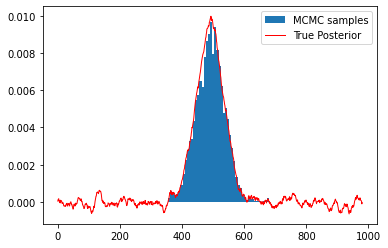

In [206]:
nsamples = 100000
samples = generate_samples(posterior, n_samples=nsamples, burn_in=100, start_sample=400)
plt.hist(samples, bins=100, density=True, label="MCMC samples");
plt.plot(posterior/np.sum(posterior), color='red', linewidth=1, label='True Posterior')
plt.legend();